# EDA (Exploratory Data Analysis)
### Think as Detective Work.
It's the step where you explore the data to :
* Understand it
* Discover Patterns
* Spot Anomalies
* Generate Insights
* and decide what to do next

### Steps 
* Viewing the Data >> head(),tail(),shape(),info()
* Summary Stats >> mean,median,mode,std,min,max,quartiles (helps understand spread and central tendency.)
* Value Count >> Unique Values (great for categorical columns)
* Missing Value Analysis >> Gaps? , % of data missing?
* Visualizations
* Target Variable Exploration >> H0w does ur Output related to other variables

#### Impute Data with (Data Cleaning)
* Mean / Median >> For numerical data
* Mode >>For Categorical data
* Advanced : Linear Regession, KNN, or interpolation.

# Project 1

In [71]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [72]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [74]:
df.shape

(1338, 7)

In [75]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [76]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

#### For Count of each column 

In [77]:
#Alternative approach if you want to see value counts for each column separately:
for col in ['sex', 'smoker', 'region', 'children']:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())


Value counts for sex:
sex
male      676
female    662
Name: count, dtype: int64

Value counts for smoker:
smoker
no     1064
yes     274
Name: count, dtype: int64

Value counts for region:
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

Value counts for children:
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


In [78]:
df.isnull().sum()
#This data is already cleaned.

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [79]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

#### For Printing all numeric Column Histogram.

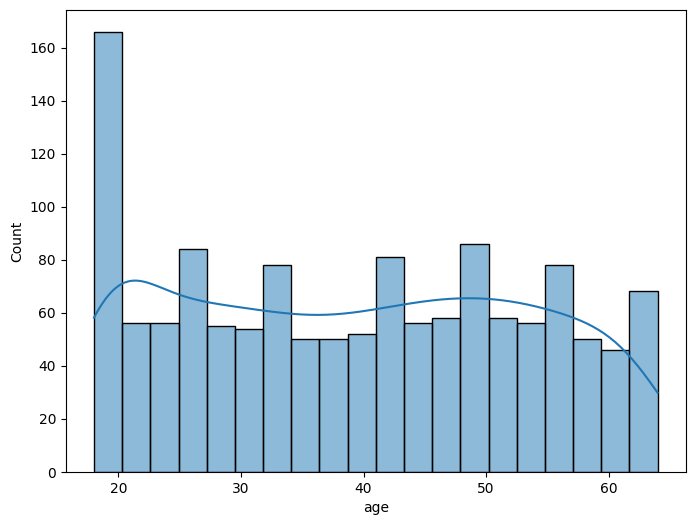

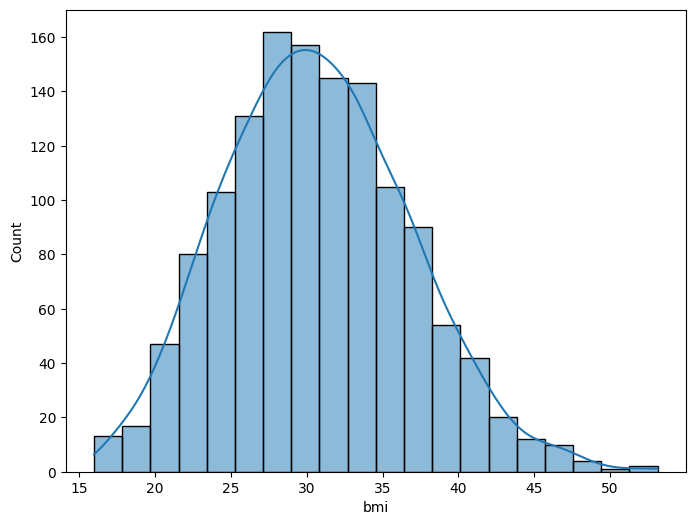

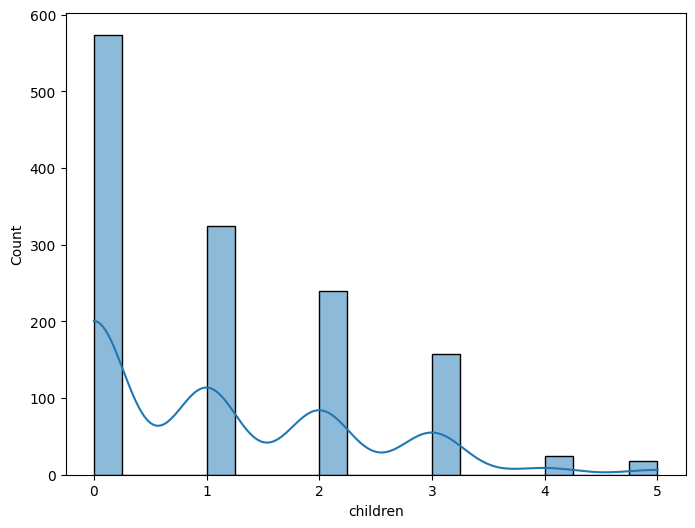

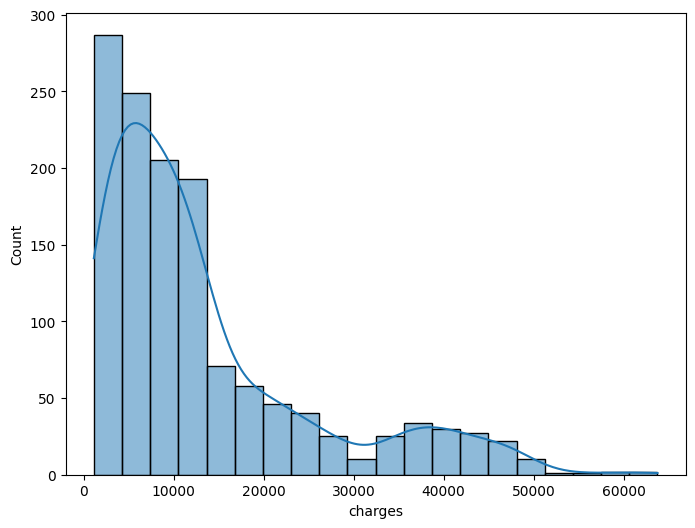

In [80]:
numeric_columns=['age','bmi','children','charges']
for col in numeric_columns:
    plt.figure(figsize=(8,6))
    sns.histplot(df[col],kde=True,bins=20)

<Axes: xlabel='children', ylabel='count'>

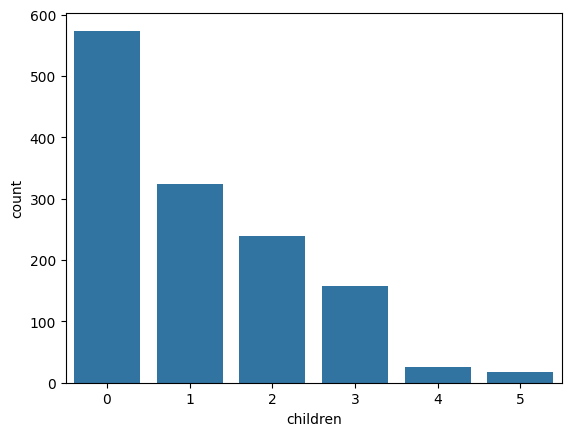

In [81]:
sns.countplot(x=df['children'])

<Axes: xlabel='sex', ylabel='count'>

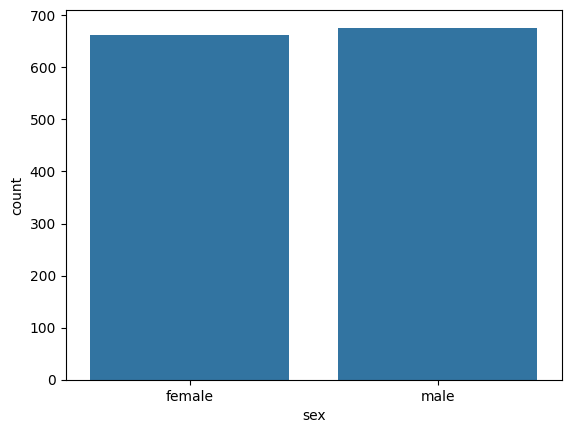

In [82]:
sns.countplot(x=df['sex'])

<Axes: xlabel='smoker', ylabel='count'>

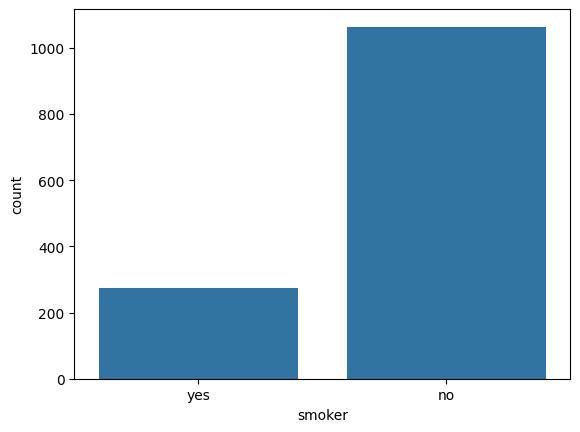

In [83]:
sns.countplot(x=df['smoker'])

<Axes: xlabel='sex', ylabel='count'>

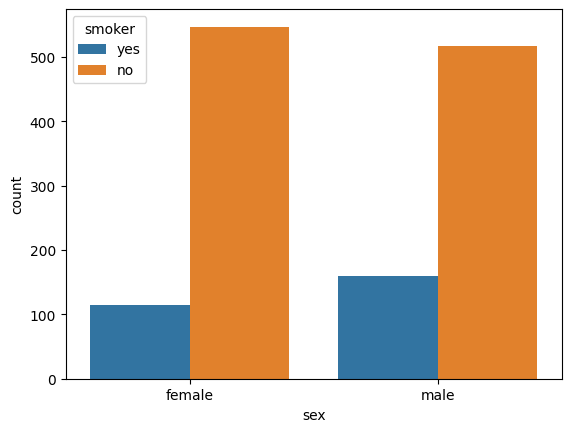

In [84]:
sns.countplot(x=df['sex'],hue=df['smoker'])

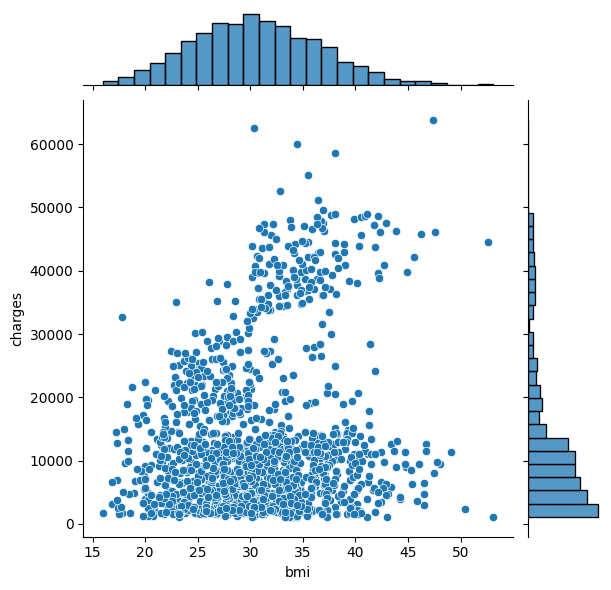

In [85]:
sns.jointplot(x=df['bmi'],y=df['charges'],kind='scatter')

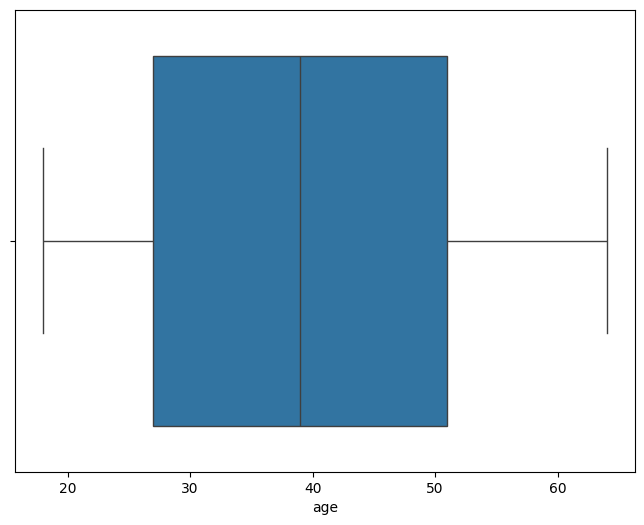

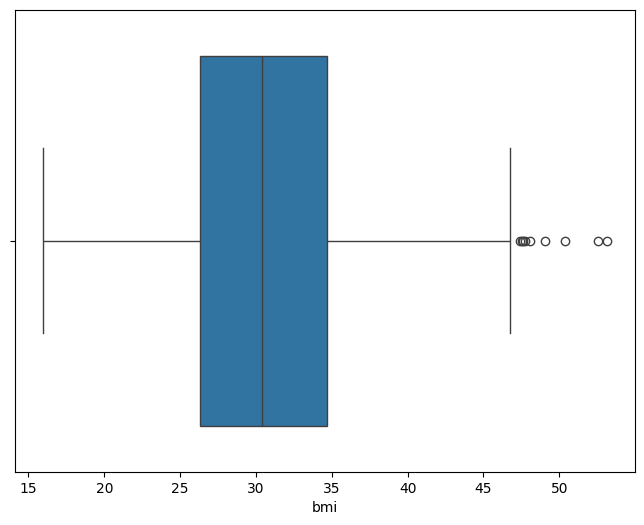

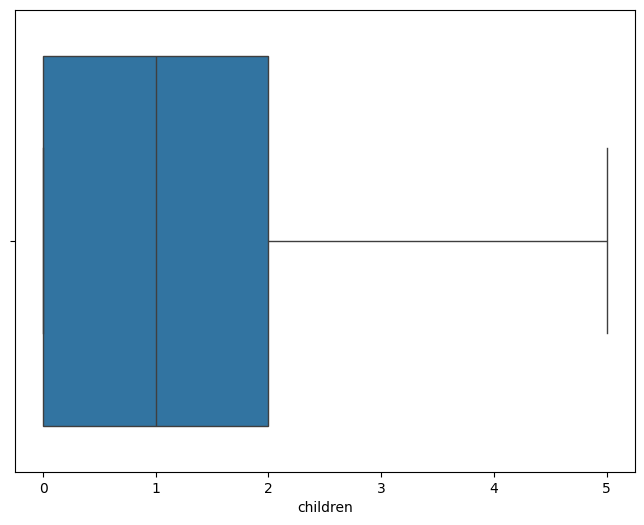

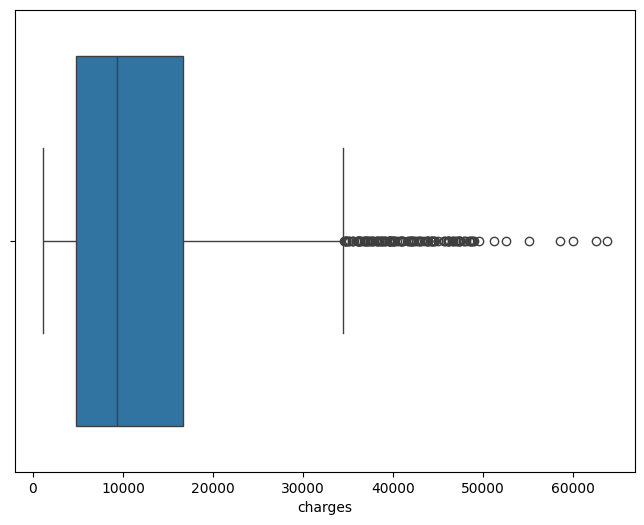

In [86]:
for box in numeric_columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=df[box])

<Axes: >

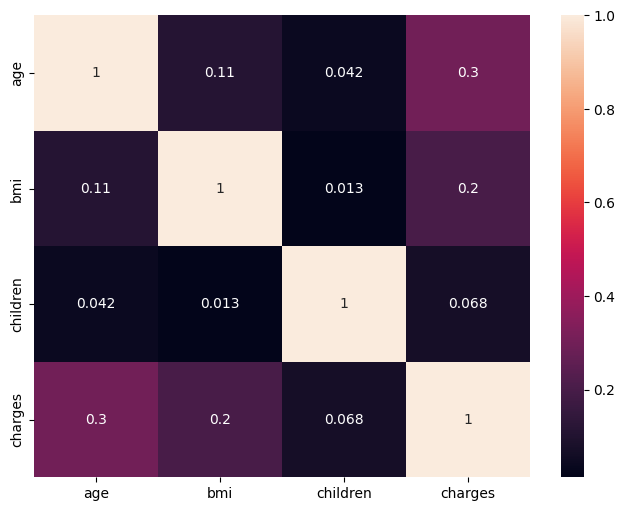

In [87]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)

# Data Cleaning and Processing 

In [88]:
df_clean=df.copy()

In [89]:
df_clean.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [90]:
df_clean.shape

(1338, 7)

In [91]:
df_clean.drop_duplicates(inplace=True)

In [92]:
df_clean.shape  # 1 row is duplicate

(1337, 7)

In [93]:
df_clean.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [94]:
df_clean.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [95]:
df_clean['sex'].value_counts()     #Capital and Small letter se bhi farak pad sat ahia 

sex
male      675
female    662
Name: count, dtype: int64

In [96]:
df_clean.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [97]:
Columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
for i in Columns:
    print(f"\n Value count of {i}")
    print(df_clean[i].value_counts())


 Value count of age
age
18    69
19    67
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64

 Value count of sex
sex
male      675
female    662
Name: count, dtype: int64

 Value count of bmi
bmi
32.30    13
28.31     9
30.80     8
31.35     8
28.88     8
         ..
46.20     1
23.80     1
44.77     1
32.12     1
30.97     1
Name: count, Length: 548, dtype: int64

 Value count of children
children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

 Value count of smoker
smoker
no     1063
yes     274
Name: count, dtype: int64

 Value count of region
region
southeast    364
southwe

# Encoding of Data

#### Label Encoding 

In [98]:
df_clean['sex']=df_clean['sex'].map({"male":0,"female":1})

In [99]:
df_clean.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [100]:
df_clean['smoker']=df_clean['smoker'].map({"no":0,"yes":1})

In [101]:
df_clean.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [102]:
df_clean.rename(columns={
    'sex':'is_female',
    'smoker':'is_smoker'
                           },inplace=True)

In [103]:
df_clean.head()

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


#### One-Hot Encoding

In [104]:
df_clean=pd.get_dummies(df_clean,columns=['region'],drop_first=True)    #First drop_first use nhi karna northeast wale delete ho jata hai 

In [66]:
df_clean.head()

,age,is_female,bmi,children,is_smoker,charges,charges_bin,region_northeast,region_northwest,region_southeast,region_southwest
0,-1,1,0,0,1,16884,3,0,0,0,1
1,-1,0,0,0,0,1725,0,0,0,1,0
2,0,0,0,1,0,4449,0,0,0,1,0
3,0,0,-1,0,0,21984,3,0,1,0,0
4,0,0,0,0,0,3866,0,0,1,0,0


In [105]:
df_clean=df_clean.astype(int)

In [106]:
df_clean

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0
1334,18,1,31,0,0,2205,0,0,0
1335,18,1,36,0,0,1629,0,1,0
1336,21,1,25,0,0,2007,0,0,1


# Feature Engineering and Extraction

#### Now, we have to do hit and trial for getting more accuracy

You can interfere with all but dont play with charges because at the end you want to predict that.

<Axes: xlabel='bmi', ylabel='Count'>

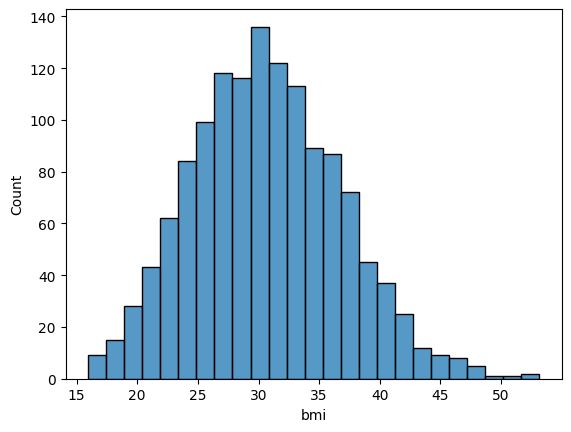

In [107]:
sns.histplot(df['bmi'])

In [108]:
# We have to make the bins for catgorisation of bmi.
# Ye Khud categories kar dega bmi category ko                  (Learn this)

df_clean['bmi_category']=pd.cut(
    df_clean['bmi'],
    bins=[0,18.5,24.9,29.9,float('inf')],                        # (infinity)
    labels=['Underweight','Healthy_Weight','Overweight','Obesity']

)

In [109]:
df_clean.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27,0,1,16884,0,0,1,Overweight
1,18,0,33,1,0,1725,0,1,0,Obesity
2,28,0,33,3,0,4449,0,1,0,Obesity
3,33,0,22,0,0,21984,1,0,0,Healthy_Weight
4,32,0,28,0,0,3866,1,0,0,Overweight


In [112]:
df_clean=pd.get_dummies(df_clean,columns=['bmi_category'],drop_first=True)

KeyError: "None of [Index(['bmi_category'], dtype='object')] are in the [columns]"

In [113]:
df_clean.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Healthy_Weight,bmi_category_Overweight,bmi_category_Obesity
0,19,1,27,0,1,16884,0,0,1,False,True,False
1,18,0,33,1,0,1725,0,1,0,False,False,True
2,28,0,33,3,0,4449,0,1,0,False,False,True
3,33,0,22,0,0,21984,1,0,0,True,False,False
4,32,0,28,0,0,3866,1,0,0,False,True,False


In [115]:
df_clean=df_clean.astype(int)

In [116]:
df_clean.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Healthy_Weight,bmi_category_Overweight,bmi_category_Obesity
0,19,1,27,0,1,16884,0,0,1,0,1,0
1,18,0,33,1,0,1725,0,1,0,0,0,1
2,28,0,33,3,0,4449,0,1,0,0,0,1
3,33,0,22,0,0,21984,1,0,0,1,0,0
4,32,0,28,0,0,3866,1,0,0,0,1,0


# Feature Scaling
* used when we are doing regression model  
* for KNN we don't have to go for "feature Scaling"

#### Standard Scaler >> Library of sklearn

In [117]:
df_clean.columns   #bmi, age,children ko karna padega

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Healthy_Weight', 'bmi_category_Overweight',
       'bmi_category_Obesity'],
      dtype='object')

In [118]:
from sklearn.preprocessing import StandardScaler
cols=['age','bmi','children']
scaler = StandardScaler() #Object            # OOPS Padh lena bhai

df_clean[cols]=scaler.fit_transform(df_clean[cols])

In [119]:
df_clean.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Healthy_Weight,bmi_category_Overweight,bmi_category_Obesity
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,0,1,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0,0,0,1
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0,0,0,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0,1,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0,0,1,0


# Pearson Correclation to check the correlation between Age and Charges 

In [120]:
df_clean.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Healthy_Weight', 'bmi_category_Overweight',
       'bmi_category_Obesity'],
      dtype='object')

In [123]:
from scipy.stats import pearsonr

# ----------------------------------
# Pearson Correlation Calculation
# ----------------------------------

# List of features to check against target
selected_features = [
       'age', 'is_female', 'bmi', 'children', 'is_smoker', 'region_northwest', 'region_southeast',
       'region_southwest',
       'bmi_category_Healthy_Weight', 'bmi_category_Overweight',
       'bmi_category_Obesity'
]

correlations = {
    feature: pearsonr(df_clean[feature], df_clean['charges'])[0]
    for feature in selected_features
}
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Pearson Correlation'])
correlation_df.sort_values(by='Pearson Correlation', ascending=False)

,Feature,Pearson Correlation
4,is_smoker,0.787234
0,age,0.298309
10,bmi_category_Obesity,0.200348
2,bmi,0.196236
6,region_southeast,0.073577
3,children,0.067390
5,region_northwest,-0.038695
7,region_southwest,-0.043637
1,is_female,-0.058046
8,bmi_category_Healthy_Weight,-0.104042


#### If Correlation 
* Above .50   >> Can Use 
* between .2 to .5 >> Can Use
* between .1 to .2 >> Can Negotiable (After Training model if accuracy score is good then we keep otherwise drop that column)

# Category Correlation me hum Ussually Chi Square test follow karte hai

#### Chi Square test >> Different categories me relation dikhata hai 
#### but hamara target variable category nhi hai >> Charges ki bins banna lege

In [125]:
cat_features = [
    'is_female','is_smoker', 'region_northwest', 'region_southeast',
       'region_southwest',
       'bmi_category_Healthy_Weight', 'bmi_category_Overweight',
       'bmi_category_Obesity'
]

In [126]:
# Revise Stats 

from scipy.stats import chi2_contingency
import pandas as pd

alpha = 0.05
df_clean['charges_bin']=pd.qcut(df_clean['charges'],q=4,labels=False)
chi2_results={}

for col in cat_features:
    contingency = pd.crosstab(df_clean[col], df_clean['charges_bin'])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency)                                        #Samajh nhi aya 
    decision = 'Reject Null (Keep Feature)' if p_val < alpha else 'Accept Null (Drop Feature)'
    chi2_results[col] = {
        'chi2_statistic': chi2_stat,
        'p_value': p_val,
        'Decision': decision
    }

chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='p_value')
chi2_df

,chi2_statistic,p_value,Decision
is_smoker,848.219178,0.0,Reject Null (Keep Feature)
region_southeast,15.998167,0.001135,Reject Null (Keep Feature)
is_female,10.258784,0.01649,Reject Null (Keep Feature)
bmi_category_Obesity,8.515711,0.036473,Reject Null (Keep Feature)
region_southwest,5.091893,0.165191,Accept Null (Drop Feature)
bmi_category_Overweight,4.25149,0.235557,Accept Null (Drop Feature)
bmi_category_Healthy_Weight,3.708088,0.29476,Accept Null (Drop Feature)
region_northwest,1.13424,0.768815,Accept Null (Drop Feature)


In [127]:
df_clean.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Healthy_Weight', 'bmi_category_Overweight',
       'bmi_category_Obesity', 'charges_bin'],
      dtype='object')

In [129]:
final_df=df_clean[['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_southeast','bmi_category_Obesity']]

In [130]:
final_df.head()

,age,is_female,bmi,children,is_smoker,charges,region_southeast,bmi_category_Obesity
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0
1,-1.511647,0,0.462463,-0.079442,0,1725,1,1
2,-0.799350,0,0.462463,1.580143,0,4449,1,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,0,0


# We should also have the data for Training Our Model 
##### Train >> By 80% of Data 
##### Test >> By 20% of Data (Compare Predictions With Original Values)
Train-Test Split >> Using Sklearn

In [135]:
from sklearn.model_selection import train_test_split
X = final_df.drop('charges',axis=1)    #Drop the Output feature 
y=final_df['charges']

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [137]:
from sklearn.linear_model import LinearRegression

In [140]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [142]:
y_pred = model.predict(X_test)

In [143]:
y_pred

array([ 7856.41808069,  5379.07145062, 14613.47489419, 32465.93193508,
        8955.35729283, 13336.43605749, 30199.07309038,  1403.40503994,
       11196.90873514, 10018.65838301, 10818.71629044, 32144.43533014,
       31550.26059902, 16230.55597963, 10285.99989714,  8488.6608457 ,
        5487.64476113, 32465.09672212,  3304.46601962,  3877.00422671,
        4760.01023433, 28796.29743032, 13870.98195763, 29541.88243902,
       31520.15678042,  6344.44675222, 35026.69683204, 37880.73853364,
       12490.06211178, 14238.95332785,  7573.09915473, 13049.08020135,
         516.21534048, 11339.74207305, 37584.28749479, 13356.84393437,
        3706.96614326,  4537.12786929, 31481.80485676,  8009.55465514,
        6075.79442888, 30404.81913857, 35276.56346051, 13099.59189682,
        7977.69705664,  2987.00634487,  5174.11237148,  7620.54073087,
        3522.89053725, 10388.99625751,  7820.00530896, 10505.68054495,
       30331.09138384,  4687.62077185, 11676.0149257 , 11446.77536361,
      

In [144]:
y_test

900      8688
1064     5708
1256    11436
298     38746
237      4463
        ...  
534     13831
542     13887
760      3925
1284    47403
1285     8534
Name: charges, Length: 268, dtype: int32

# Compare test with prediction
Performance evaluation

In [145]:
from sklearn.metrics import r2_score

r2=r2_score(y_test,y_pred)
r2

0.8040712413347118

In [148]:
n=X_test.shape[0]
p=X_test.shape[1]
adjusted_r2 = 1-((1-r2) * (n-1)/ (n-p-1))
adjusted_r2

0.7987962362937232